# Data analysis of lottery experiment

## Import dependencies
We use Pandas to handle our data, numpy for some random sampling and matplotlib to generate plots. In addition we need Matplotlibs PDF backend to export high-quality versions of our plot

In [73]:
#Import dependencies
import pandas as pd
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

%matplotlib inline


## Importing and cleaning the data


### Selecting the data to import
The only data we are interested in are the names of the participants, their indicated risk preferences. With pandas we can define which columns we want to pick from the input file with the usecols argument. 

In [74]:
# Create a list of the column names corresponding with the number of choices in df
choices = ["player.choice_" + str(i) for i in range(1,9)]
# Select the other columns we want
cols = ['player.id_in_group', 'player.name', 'player.risk', 'session.code']
# Merge the two lists
usecols = cols + choices

# Create the dataframe from CSV
df = pd.read_csv('../Data/risk_lottery_2019-12-11.csv', usecols=usecols)

#We only want the data from the relevant session
df = df.loc[df['session.code'] == '32nbns7y']

# Delete empty sessions
df = df.dropna()

# Drop an irrelevant entry (Last Entry in Session)
df = df.drop(df.index[-1])




## Some functions to make data more readable
A function to replace the numeric values with a more readable output. This was made in order to export a LaTex table from the random participant.


In [75]:
def replace_numeric(df):    
    for choice in choices:
        df[choice].replace({1:'A', 0:'B'},inplace=True)
    df['player.risk'].replace({1.0:'Risk Averse', 2.0:'Risk Neutral', 3.0:'Risk Loving'}, inplace=True)
    
    return df




In [76]:
def replace_values(df):    
    for choice in choices:
        df[choice].replace({0:1, 1:0},inplace=True)    
    return df

replace_values(df)


,player.id_in_group,player.name,player.risk,player.choice_1,player.choice_2,player.choice_3,player.choice_4,player.choice_5,player.choice_6,player.choice_7,player.choice_8,session.code
182,1,Aakash Ahuja,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,32nbns7y
183,2,Andreia Albino,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,32nbns7y
184,3,Anne-Sophie Vienne,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,32nbns7y
187,6,Catarina Pereira,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,32nbns7y
189,8,Cristiana,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,32nbns7y
190,9,Daniele Veggiato,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,32nbns7y
191,10,Diogo Bessa,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,32nbns7y
192,11,federico innocenti,3.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,32nbns7y
193,12,Francisca Medeiros,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,32nbns7y
194,13,Gil Azevedo,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,32nbns7y


## Take a random sample to plot


In [77]:
def random_sample(df):
    df = df.sample(n=1)
    return df

random_participant = random_sample(df)

#Export the choices of the random participant to a LaTeX table
to_latex = random_participant.iloc[:,2:11]
to_latex_1 = replace_numeric(to_latex)
with open('../ProjectReport/includes/table.tex','w') as tf:
    tf.write(to_latex_1.to_latex(index=False, header=['Indicated', 'Choice 1', 'Choice 2', 'Choice 3', 'Choice 4', 'Choice 5', 'Choice 6', 'Choice 7', 'Choice 8']))


#select the choices and the profile of the random sample
choices_random = random_participant.iloc[:,3:11]
list = choices_random.values.tolist()
choices_made = [item for sublist in list for item in sublist]


indicated_profile = int(random_participant['player.risk'])






/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [78]:
if indicated_profile == 0:
    plot = [1,1,1,1,1,1,1,1]
    risk_profile = 'Risk Averse'
elif indicated_profile == 1:
    plot = [1,1,1,0,0,0,0,0]
    risk_profile = 'Risk Neutral'
elif indicated_profile == 2:
   plot = [0,0,0,0,0,0,0,0]
   risk_profile = 'Risk Loving'

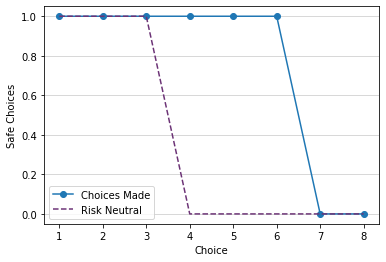

In [79]:
# Create the X-Axis 
choice = [choice for choice in range(1,9)]

plt.plot(choice,choices_made, '-o')
plt.plot(choice, plot, '--', color="#6c3376") 
plt.grid(color='black', linestyle='-', linewidth=0.5, alpha = 0.3, axis = 'y')
plt.xlabel('Choice')  
plt.ylabel('Safe Choices')  


plt.legend(['Choices Made', risk_profile])

plt.savefig('../ProjectReport/graphics/random_plot.pdf', bbox_inches="tight")



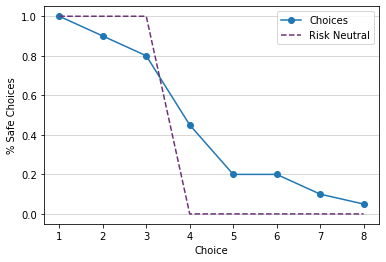

In [80]:
aggregate = df.iloc[:,3:11]

replace_values(aggregate)
def safe_choices_plot(df):
    list = []
    # Get the number of entries in the specified column
    n = df.shape[0]
    for choice in choices:
        list.append(np.sum(df[choice] == 0)/n)
    return list
    
safe_choices_plot(aggregate)
    
plt.plot(choice,safe_choices_plot(aggregate), '-o')
plt.plot(choice, [1,1,1,0,0,0,0,0], '--', color="#6c3376") 
plt.grid(color='black', linestyle='-', linewidth=0.5, alpha = 0.3, axis = 'y')
plt.xlabel('Choice')  
plt.ylabel('% Safe Choices')
plt.legend(['Choices', 'Risk Neutral'])
plt.savefig('../ProjectReport/graphics/aggregate_plot.pdf', bbox_inches="tight")

    